In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# lib praproses data
from sklearn.preprocessing import MinMaxScaler

1. Data Collections

In [2]:
# load dataset
dataset = pd.read_csv("dataset/BTC-USD.csv", parse_dates=["Date"])

In [3]:
# set index Date
dataset = dataset.set_index("Date")

In [4]:
# round .3f
dataset = np.round(dataset[["Open","High","Low","Close"]],8)

In [5]:
# show dataset
print(dataset)

                    Open          High           Low         Close
Date                                                              
2015-01-01    320.434998    320.434998    314.002991    314.248993
2015-01-02    314.079010    315.838989    313.565002    315.032013
2015-01-03    314.846008    315.149994    281.082001    281.082001
2015-01-04    281.145996    287.230011    257.612000    264.195007
2015-01-05    265.084015    278.341003    265.084015    274.473999
...                  ...           ...           ...           ...
2024-04-26  64485.371094  64789.656250  63322.398438  63755.320313
2024-04-27  63750.988281  63898.363281  62424.718750  63419.140625
2024-04-28  63423.515625  64321.484375  62793.597656  63113.230469
2024-04-29  63106.363281  64174.878906  61795.457031  63841.121094
2024-04-30  63839.417969  64703.332031  59120.066406  60636.855469

[3408 rows x 4 columns]


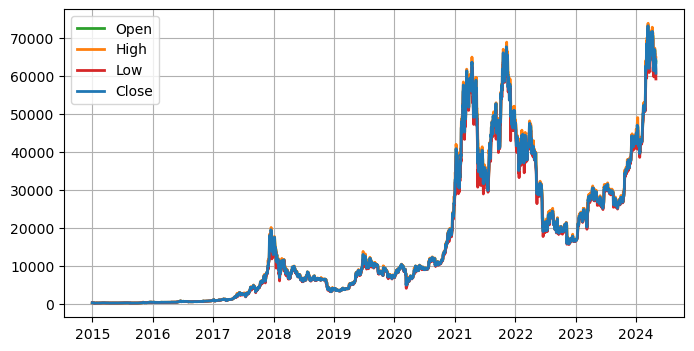

In [6]:
# create frame
fig, ax = plt.subplots(figsize = (8,4))

# time series plot
ax.plot(dataset.index.values, dataset["Open"], color="tab:green", label="Open", linewidth=2)
ax.plot(dataset.index.values, dataset["High"], color="tab:orange", label="High", linewidth=2)
ax.plot(dataset.index.values, dataset["Low"], color="tab:red", label="Low", linewidth=2)
ax.plot(dataset.index.values, dataset["Close"], color="tab:blue", label="Close", linewidth=2)

# set label-labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

plt.show()

2. Data Preprocessing

In [7]:
# choose features
data = dataset.filter(['Close']);

In [8]:
# convert dataframe to series close price
data = dataset.values
np.round(data[:],7)

array([[  320.434998,   320.434998,   314.002991,   314.248993],
       [  314.07901 ,   315.838989,   313.565002,   315.032013],
       [  314.846008,   315.149994,   281.082001,   281.082001],
       ...,
       [63423.515625, 64321.484375, 62793.597656, 63113.230469],
       [63106.363281, 64174.878906, 61795.457031, 63841.121094],
       [63839.417969, 64703.332031, 59120.066406, 60636.855469]])

In [9]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
np.round(scaled_data[:],7)

array([[0.0019689, 0.0014782, 0.0020024, 0.0018674],
       [0.0018817, 0.0014157, 0.0019962, 0.0018782],
       [0.0018922, 0.0014063, 0.0015397, 0.0014125],
       ...,
       [0.867551 , 0.8717868, 0.8799861, 0.8632437],
       [0.8632006, 0.8697932, 0.8659599, 0.8732278],
       [0.8732559, 0.8769793, 0.8283645, 0.8292768]])

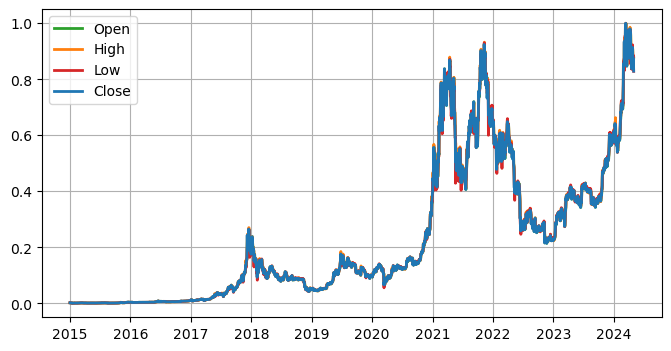

In [11]:
# create frame
fig, ax = plt.subplots(figsize = (8,4))

# time series plot
ax.plot(dataset.index.values, scaled_data[:,0:1], color="tab:green", label="Open", linewidth=2)
ax.plot(dataset.index.values, scaled_data[:,1:2], color="tab:orange", label="High", linewidth=2)
ax.plot(dataset.index.values, scaled_data[:,2:3], color="tab:red", label="Low", linewidth=2)
ax.plot(dataset.index.values, scaled_data[:,3:4], color="tab:blue", label="Close", linewidth=2)

# set label-labels
ax.set_title("",fontsize=14)
ax.set_xlabel("",fontsize=12)
ax.set_ylabel("",fontsize=12)
ax.legend(loc="best")
ax.grid(True)

plt.show()

3. Results of Preprocessing

In [12]:
# date = pd.DataFrame(dataset.index.values, columns=["Date"])
# ohlc = pd.DataFrame(scaled_data, columns=["Open", "High", "Low", "Close"])

In [13]:
# df_normalized = pd.concat([date,ohlc], axis=1)

In [14]:
# df_normalized.to_csv("dataset/BTC-USD-norm.csv")